In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

import seaborn as sns
import matplotlib.pyplot as plt


In [5]:


#def fromatXvals(X):
#    formattedX = []
#    i = 0
#    for i in range(len(X)):
#        columns = [X[i][j*6:(j+1)*6] for j in range(7)]
#        formattedX.append( np.flipud(np.array(columns).T) )# transposing to get the expes

# Load dataset
data = pd.read_csv('Data/connect+4/connect-4.data', header=None)
#print (data)
# --- formatting X values --- 
# Map cell values
cellMap = {'x': 1, 'o': 2, 'b': 0}
X = data.iloc[:, :-1].map(lambda x: cellMap.get(x, x))
X = X.to_numpy() ## x is input values 
#formattedX = fromatXvals(X) ## getting x to look like a connect 4 boards for display only
print(X[0])
#print(formattedX)

# --- formating Y values ---
y = data.iloc[:, -1] # getting form 

# hot encoding 
classes = ['draw', 'loss', 'win']
def oneHotEncode(label, classes):
    oneHot = np.zeros(len(classes))
    index = classes.index(label)  # Find the index of the label
    oneHot[index] = 1  # Set the corresponding index to 1
    return oneHot

def oneHotDecode(oneHot, classes):
    index = np.argmax(oneHot)
    return classes[index]
    
# Convert to one-hot encoded labels
y  = np.array([oneHotEncode(label, classes) for label in y])
#print(y)# test

print(X.shape)  # Should be (number_of_samples, 6, 7)
print(y.shape)  # Should be (number_of_samples,)

[0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 1 2 1 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
(67557, 42)
(67557, 3)


In [12]:
# spritting the data for train/ testing 

XTrain, XTest, yTrain, yTest = train_test_split(
    X, y, 
    test_size=0.2,   
    random_state=42 ## locks random state for debugging nothing to do with board size
)

print(yTrain)
print(XTrain)



[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1 2 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 2 0 ... 0 0 0]
 [2 2 0 ... 0 0 0]]


In [18]:
 ## inital tests 
model1 = Sequential()

# Input layer 128 neuron
model1.add(Input(shape=(42,)))
model1.add(Dense(128, activation='relu'))

# 1st Hidden layer 64 neurons
model1.add(Dense(64, activation='relu'))
#model1.add(Dropout(0.3))  

# 2nd Hidden layer (32 neurons)
model1.add(Dense(32, activation='relu'))
#model1.add(Dropout(0.3))  

# Output layer 3 neurons for win/draw/loss
model1.add(Dense(3, activation='softmax'))


model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,939 (62.26 KB)

 Trainable params: 15,939 (62.26 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model1.fit(XTrain, yTrain, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6765 - loss: 0.7868 - val_accuracy: 0.7310 - val_loss: 0.6602
Epoch 2/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7534 - loss: 0.6160 - val_accuracy: 0.7719 - val_loss: 0.5735
Epoch 3/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7830 - loss: 0.5476 - val_accuracy: 0.7826 - val_loss: 0.5430
Epoch 4/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7960 - loss: 0.5147 - val_accuracy: 0.7897 - val_loss: 0.5262
Epoch 5/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8002 - loss: 0.4991 - val_accuracy: 0.7926 - val_loss: 0.5158
Epoch 6/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8108 - loss: 0.4712 - val_accuracy: 0.8037 - val_loss: 0.4951
Epoch 7/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8188 - loss: 0.4562 - val_accuracy: 0.7930 - val_loss: 0.5183
Epoch 8/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8194 - loss: 0.4466 - 

In [20]:
## testing
loss, accuracy = model1.evaluate(XTest, yTest)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.8119 - loss: 0.4914
Test accuracy: 0.8119
Test loss: 0.4891


In [21]:
## creating models with varing amounts of neurons to see which is teh best speed accuracy trade off

models = {}
n = 4
while n <= 9:
    model = Sequential()
    # Input layer
    model.add(Input(shape=(42,)))
    model.add(Dense(2**n, activation='relu'))
    
    # 1st Hidden layer 
    model.add(Dense(2**(n-1), activation='relu'))
    #model.add(Dropout(0.3))  
    
    # 2nd Hidden layer 
    model.add(Dense(2**(n-2), activation='relu'))
    #model.add(Dropout(0.3))  
    
    # Output layer 3 neurons for win/draw/loss
    model.add(Dense(3, activation='softmax'))
    
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    models[(2**n)]= model
    n+=1
    
print(models)
 ## testing the data with differnt epoch values
results = pd.DataFrame(columns=['epochs', 'neurons', 'accuracy'])
for startNeuronNum, model in models.items():
    epochVal = 10
    while epochVal <= 30:
        model.fit(XTrain, yTrain, epochs=epochVal, batch_size=32, validation_split=0.2)
        loss, accuracy = model.evaluate(XTest, yTest)
        ## adding to data stucture 
        newResult = {'epochs': epochVal, 'neurons': startNeuronNum, 'accuracy': accuracy}
        results = pd.concat([results, pd.DataFrame([newResult])], ignore_index=True)
        epochVal+=5
    
# formating data 
formatedResults = results.pivot(index='epochs', columns='neurons', values='accuracy')

print(formatedResults)



{16: <Sequential name=sequential_3, built=True>, 32: <Sequential name=sequential_4, built=True>, 64: <Sequential name=sequential_5, built=True>, 128: <Sequential name=sequential_6, built=True>, 256: <Sequential name=sequential_7, built=True>, 512: <Sequential name=sequential_8, built=True>}
Epoch 1/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6479 - loss: 0.9012 - val_accuracy: 0.6562 - val_loss: 0.8123
Epoch 2/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6705 - loss: 0.7974 - val_accuracy: 0.6823 - val_loss: 0.7756
Epoch 3/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6896 - loss: 0.7509 - val_accuracy: 0.6942 - val_loss: 0.7363
Epoch 4/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7061 - loss: 0.7216 - val_accuracy: 0.7089 - val_loss: 0.7124
Epoch 5/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7196 - loss: 0.6976 - val_accuracy: 0.7123 - val_loss: 0.7034
Epoch 6/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - ac

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_16808\2646921950.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([newResult])], ignore_index=True)


1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7441 - loss: 0.6362 - val_accuracy: 0.7341 - val_loss: 0.6501
Epoch 2/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7451 - loss: 0.6339 - val_accuracy: 0.7336 - val_loss: 0.6468
Epoch 3/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7495 - loss: 0.6271 - val_accuracy: 0.7388 - val_loss: 0.6403
Epoch 4/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7489 - loss: 0.6285 - val_accuracy: 0.7373 - val_loss: 0.6397
Epoch 5/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7523 - loss: 0.6195 - val_accuracy: 0.7400 - val_loss: 0.6356
Epoch 6/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7566 - loss: 0.6183 - val_accuracy: 0.7315 - val_loss: 0.6579
Epoch 7/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7569 - loss: 0.6109 - val_accuracy: 0.7397 - val_loss: 0.6341
Epoch 8/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7543 - loss: 0.6169 - val_accurac

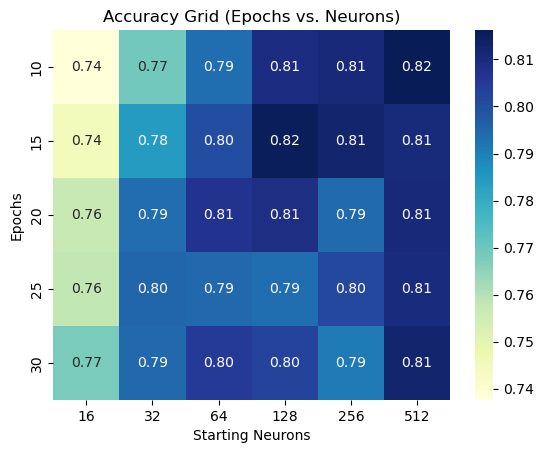

In [22]:
## heat map code 
sns.heatmap(formatedResults, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Accuracy Grid (Epochs vs. Neurons)")
plt.ylabel("Epochs")
plt.xlabel("Starting Neurons")
plt.show()

In [23]:
#formatedResults
best = results.loc[results['accuracy'].idxmax()]
print(f"Best config: epochs={best['epochs']}, neurons={best['neurons']}, accuracy={best['accuracy']}")

Best config: epochs=10, neurons=512, accuracy=0.8162373900413513


In [49]:
## the best model
bestModel = Sequential()



# Input layer 
bestModel.add(Input(shape=(42,)))
bestModel.add(Dense(best['neurons'], activation='relu'))

# 1st Hidden layer
bestModel.add(Dense(int(best['neurons']/2), activation='relu'))
#model1.add(Dropout(0.3))  

# 2nd Hidden layer 
bestModel.add(Dense(int(best['neurons']/4), activation='relu'))
#model1.add(Dropout(0.3))  

# Output layer 3 neurons for win/draw/loss
bestModel.add(Dense(3, activation='softmax'))


bestModel.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
bestModel.fit(XTrain, yTrain, epochs=best['epochs'], batch_size=32, validation_split=0.2)
bestModel.summary()




Epoch 1/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6881 - loss: 0.7590 - val_accuracy: 0.7450 - val_loss: 0.6268
Epoch 2/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7735 - loss: 0.5704 - val_accuracy: 0.7913 - val_loss: 0.5252
Epoch 3/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7963 - loss: 0.5048 - val_accuracy: 0.7959 - val_loss: 0.5103
Epoch 4/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8145 - loss: 0.4631 - val_accuracy: 0.8038 - val_loss: 0.4896
Epoch 5/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8283 - loss: 0.4258 - val_accuracy: 0.8039 - val_loss: 0.4859
Epoch 6/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8358 - loss: 0.4070 - val_accuracy: 0.8085 - val_loss: 0.4753
Epoch 7/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8492 - loss: 0.3756 - val_accuracy: 0.8152 - val_loss: 0.4665
Epoch 8/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8514 - loss: 0.3689 - 

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 512)                 │          22,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559,883 (2.14 MB)

 Trainable params: 186,627 (729.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 373,256 (1.42 MB)

In [51]:
## storing in file
bestModel.save("Models/NeuaralNetwork_Connect4.h5")

In [57]:
#tests for game agent
testData = [
  2, 1, 2, 0, 0, 0, 0,  # row 0 (top)
  1, 2, 1, 0, 0, 0, 0,  # row 1
  2, 1, 2, 1, 0, 0, 0,  # row 2
  1, 2, 2, 2, 0, 0, 0,  # row 3
  1, 2, 2, 1, 0, 0, 2,  # row 4
  1, 2, 1, 1, 0, 0, 2   # row 5 (bottom)
]
encodedInput = np.array(testData).reshape(1, 42)
probs = bestModel.predict(encodedInput)
print(probs)
index = np.argmax(probs)
print(oneHotDecode(probs, classes))
confidence = round(probs[0][index],3)
print(confidence)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.5149879  0.05624072 0.42877135]]
draw
0.515


In [53]:
# loading test 
model = load_model("Models\\NeuaralNetwork_Connect4.h5")

In [55]:
#tests for game agent
testData = [
  2, 1, 2, 0, 0, 0, 0,  # row 0 (top)
  1, 2, 1, 0, 0, 0, 0,  # row 1
  2, 1, 2, 1, 0, 0, 0,  # row 2
  1, 2, 2, 2, 0, 0, 0,  # row 3
  1, 2, 2, 1, 0, 0, 2,  # row 4
  1, 2, 1, 1, 0, 0, 2   # row 5 (bottom)
]
encodedInput = np.array(testData).reshape(1, 42)
probs = model.predict(encodedInput)
print(probs)
index = np.argmax(probs)
print(oneHotDecode(probs, classes))
confidence = round(probs[0][index],3)
print(confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.5149879  0.05624072 0.42877135]]
draw
0.515


In [63]:
import sys
import tensorflow as tf
print(sys.executable)  # This shows the Python environment path
print(tf.__version__) 

D:\Program Files\Anaconda\python.exe
2.19.0


{16: <Sequential name=sequential_18, built=True>, 32: <Sequential name=sequential_19, built=True>, 64: <Sequential name=sequential_20, built=True>, 128: <Sequential name=sequential_21, built=True>, 256: <Sequential name=sequential_22, built=True>, 512: <Sequential name=sequential_23, built=True>}
Epoch 1/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2185 - mae: 0.3603 - mse: 0.2185 - val_loss: 0.1584 - val_mae: 0.3139 - val_mse: 0.1584
Epoch 2/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1547 - mae: 0.3094 - mse: 0.1547 - val_loss: 0.1510 - val_mae: 0.2989 - val_mse: 0.1510
Epoch 3/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1479 - mae: 0.2972 - mse: 0.1479 - val_loss: 0.1443 - val_mae: 0.2951 - val_mse: 0.1443
Epoch 4/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1417 - mae: 0.2863 - mse: 0.1417 - val_loss: 0.1384 - val_mae: 0.2768 - val_mse: 0.1384
Epoch 5/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1351 - mae: 0.2740 - mse: 0.13

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_2344\1929052128.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([newResult])], ignore_index=True)


1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1209 - mae: 0.2512 - mse: 0.1209 - val_loss: 0.1264 - val_mae: 0.2499 - val_mse: 0.1264
Epoch 2/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1194 - mae: 0.2485 - mse: 0.1194 - val_loss: 0.1224 - val_mae: 0.2535 - val_mse: 0.1224
Epoch 3/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1190 - mae: 0.2477 - mse: 0.1190 - val_loss: 0.1213 - val_mae: 0.2534 - val_mse: 0.1213
Epoch 4/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1178 - mae: 0.2459 - mse: 0.1178 - val_loss: 0.1213 - val_mae: 0.2542 - val_mse: 0.1213
Epoch 5/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1168 - mae: 0.2437 - mse: 0.1168 - val_loss: 0.1201 - val_mae: 0.2548 - val_mse: 0.1201
Epoch 6/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1155 - mae: 0.2412 - mse: 0.1155 - val_loss: 0.1193 - val_mae: 0.2437 - val_mse: 0.1193
Epoch 7/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1158 - mae: 0.2401 - mse: 0.1158 - 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0185 - mae: 0.0556 - mse: 0.0185 - val_loss: 0.0972 - val_mae: 0.1464 - val_mse: 0.0972
Epoch 12/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0172 - mae: 0.0526 - mse: 0.0172 - val_loss: 0.0981 - val_mae: 0.1441 - val_mse: 0.0981
Epoch 13/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0161 - mae: 0.0504 - mse: 0.0161 - val_loss: 0.0998 - val_mae: 0.1497 - val_mse: 0.0998
Epoch 14/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0164 - mae: 0.0511 - mse: 0.0164 - val_loss: 0.1020 - val_mae: 0.1513 - val_mse: 0.1020
Epoch 15/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0158 - mae: 0.0499 - mse: 0.0158 - val_loss: 0.0999 - val_mae: 0.1482 - val_mse: 0.0999
Epoch 16/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0160 - mae: 0.0496 - mse: 0.0160 - val_loss: 0.1028 - val_mae: 0.1473 - val_mse: 0.1028
Epoch 17/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0149 - mae: 0.0473 - mse: 0.0

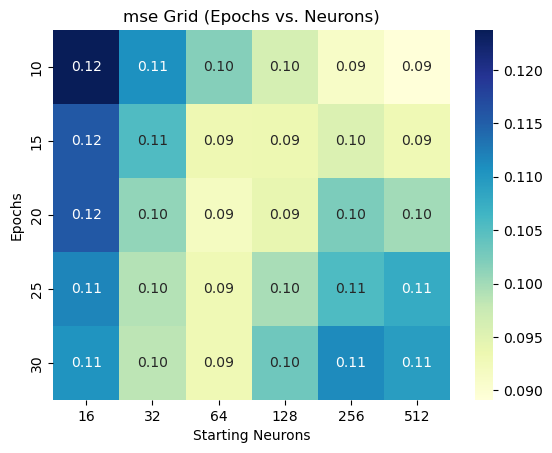

In [20]:
## heat map code for mse
sns.heatmap(formatedResultsMSE, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("mse Grid (Epochs vs. Neurons)")
plt.ylabel("Epochs")
plt.xlabel("Starting Neurons")
plt.show()

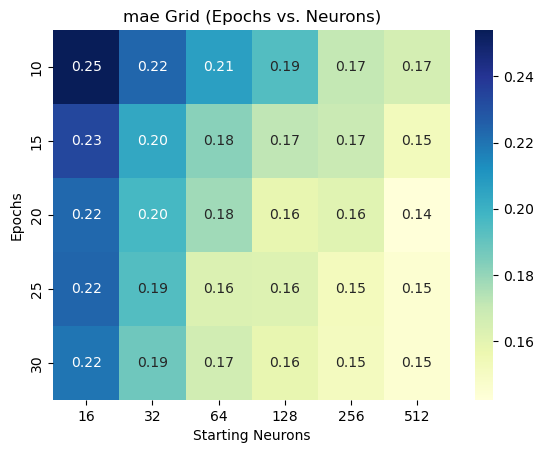

In [22]:
## heat map code for mae
sns.heatmap(formatedResultsMAE, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("mae Grid (Epochs vs. Neurons)")
plt.ylabel("Epochs")
plt.xlabel("Starting Neurons")
plt.show()

In [24]:
#formatedResults
best = results.loc[results['mse'].idxmin()]
print(f"Best config: epochs={best['epochs']}, neurons={best['neurons']}, mse={best['mse']}")

Best config: epochs=10, neurons=512, mse=0.08913471549749374


In [36]:
## the best model
bestModel = Sequential()

# Input layer 
bestModel.add(Input(shape=(42,)))
bestModel.add(Dense(best['neurons'], activation='relu'))

# 1st Hidden layer
bestModel.add(Dense(int(best['neurons']/2), activation='relu'))
#model1.add(Dropout(0.3))  

# 2nd Hidden layer 
bestModel.add(Dense(int(best['neurons']/4), activation='relu'))
#model1.add(Dropout(0.3))  

# Output layer 3 neurons for win/draw/loss
bestModel.add(Dense(3, activation='tanh'))


bestModel.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['mae', 'mse'])
bestModel.fit(XTrain, yTrain, epochs=best['epochs'], batch_size=32, validation_split=0.2)
bestModel.summary()

Epoch 1/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5479 - mae: 1.1505 - mse: 1.5824 - val_loss: 1.5314 - val_mae: 1.1677 - val_mse: 1.6156
Epoch 2/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5144 - mae: 1.1676 - mse: 1.6165 - val_loss: 1.5314 - val_mae: 1.1677 - val_mse: 1.6156
Epoch 3/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5678 - mae: 1.1656 - mse: 1.6129 - val_loss: 1.5314 - val_mae: 1.1677 - val_mse: 1.6156
Epoch 4/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5460 - mae: 1.1665 - mse: 1.6142 - val_loss: 1.5314 - val_mae: 1.1677 - val_mse: 1.6156
Epoch 5/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5759 - mae: 1.1655 - mse: 1.6121 - val_loss: 1.5314 - val_mae: 1.1677 - val_mse: 1.6156
Epoch 6/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5616 - mae: 1.1658 - mse: 1.6130 - val_loss: 1.5314 - val_mae: 1.1677 - val_mse: 1.6156
Epoch 7/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5380 - mae: 1.1668 - mse

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)                    │ (None, 512)                 │          22,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559,883 (2.14 MB)

 Trainable params: 186,627 (729.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 373,256 (1.42 MB)

In [38]:
bestModel.save("Models/NeuaralNetworkLR_Connect4.h5")

In [40]:
#tests for game agent
testData = [
  2, 1, 2, 0, 0, 0, 0,  # row 0 (top)
  1, 2, 1, 0, 0, 0, 0,  # row 1
  2, 1, 2, 1, 0, 0, 0,  # row 2
  1, 2, 2, 2, 0, 0, 0,  # row 3
  1, 2, 2, 1, 0, 0, 2,  # row 4
  1, 2, 1, 1, 0, 0, 2   # row 5 (bottom)
]
encodedInput = np.array(testData).reshape(1, 42)
probs = model.predict(encodedInput)
print(probs)
index = np.argmax(probs)
print(oneHotDecode(probs, classes))
confidence = round(probs[0][index],3)
print(confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[-0.03491739  0.7837178   0.02598117]]
loss
0.784
